In [9]:
#사과와 오렌지를 분류학습
#과일의 무게와 표면의 상태(울퉁불퉁 :0, 매끈 :1)
#오렌지:0, 사과:1로 라벨링.
from sklearn import tree
from pandas as pd
features = [[270, 0],[250,0],[220,1],[240,1]]
labels = [0,0,1,1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(features, labels)
print(clf.predict([[190,1]]))


[1]


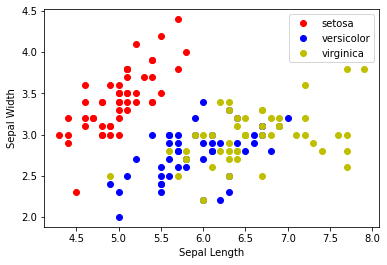

In [23]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
iris = load_iris()
sepal = iris.data[:, 0:2]
kind = iris.target
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.plot(sepal[kind==0][:,0], sepal[kind==0][:,1],"ro", label='setosa')
plt.plot(sepal[kind==1][:,0], sepal[kind==1][:,1],"bo", label='versicolor')
plt.plot(sepal[kind==2][:,0], sepal[kind==2][:,1],"yo", label='virginica')
plt.legend()

In [45]:
from sklearn.datasets import load_iris
iris = load_iris()
#print(iris.data)

from sklearn.model_selection import train_test_split

X = iris.data
y = iris.target

#(80:20)으로 분할한다.

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)
print(X_train.shape)
print(X_test.shape)

(105, 4)
(45, 4)


In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
scores = metrics.accuracy_score(y_test, y_pred)
scores

1.0

In [51]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)

#0 = setosa, 1=versicolor, 2=wirginica
classes = {0:'setosa', 1:'versicolor', 2:'virginica'}

x_new = [[10,10,10,10],[8,7,2,6]]
y_predict = knn.predict(x_new)

print(classes[y_predict[0]])
print(classes[y_predict[1]])

virginica
virginica


In [6]:
# import seaborn as sns
# import numpy as np
# %matplotlib inline

#feature importance 추

In [7]:
import pandas as pd

from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer = load_breast_cancer()

data_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
data_df.head(3)

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38           122.8     1001.0          0.11840   
1        20.57         17.77           132.9     1326.0          0.08474   
2        19.69         21.25           130.0     1203.0          0.10960   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0                 0.07871  ...         25.38          17.33            184.6   
1                 0.05667  ...         24.99          23.41            158.8   
2                 0.05999  ...         23.57          25.53            152.5   

   worst area  worst smoothness  worst compactness  worst concavity  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   

   worst concave points  worst symmetry  worst fractal dimension  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  

[3 rows x 30 columns]

In [24]:
ir_clf = LogisticRegression()
knn_clf = KNeighborsClassifier(n_neighbors=8)
vo_clf = VotingClassifier(estimators=[('LR',ir_clf),('KNN', knn_clf)], voting = 'soft')
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.2, random_state = 156)

vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print('Voting 분류기 정확도:{0:.4f}'.format(accuracy_score(y_test, pred)))

classifiers = [ir_clf, knn_dlf]
for classifier in classifiers:
    classifier.fit(X_train, y_train)
    pred = classifier.predict(X_test)
    class_name = classifier.__class__.__name__
    print('{0}정확도 :{1:.4f}'.format(class_name, accuracy_score(y_test, pred)))

Voting 분류기 정확도:0.9474
LogisticRegression정확도 :0.9386
KNeighborsClassifier정확도 :0.9386


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_